In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [108]:
# Need a function to remove dead space from audio files
# Checks a rolling average of signal over 1/10 sec and compares to threshold
# Returns a mask of True and False values that can be used to filter audio signals

def envelope(y, sr, threshold):
    mask = []
    y_abs = pd.Series(y).apply(np.abs)
    y_mean = y_abs.rolling(window = int(sr/10), min_periods = 1, center = True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return np.array(y[mask])

In [2]:
import glob
ravdess_file_list = glob.glob('/Users/ioann/radvess-XYMA/*.wav')
#ravdess_file_list = glob.glob('/Users/ioann/ravdess-speech/*.wav')

In [3]:
ravdess_file_list

['/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-01.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-02.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-03.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-04.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-05.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-06.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-07.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-08.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-09.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-10.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-11.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-12.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-13.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-14.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-15.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-16.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-17.wav',
 '/Users/ioann/radvess-XYMA\\03-01-01-01-01-01-1

In [111]:
def clean_files(file_list):
    count = 0

    for file in file_list:
        y, sr = librosa.load(file)
        y = envelope(y, sr, 0.0005)
        save_file = 'clean/' + file
        
        if not os.path.exists(os.path.dirname(save_file)):
            try:
                os.makedirs(os.path.dirname(save_file))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        
        with open(save_file, 'w') as new_file:
            sf.write(save_file, y, sr)
            new_file.close()
            
        count += 1
        if count % 100 == 0:
            print('cleaned and saved 100 files')
    
    print("cleaning complete!")

In [4]:
clean_files(ravdess_file_list)

NameError: name 'clean_files' is not defined

In [5]:
ravdess_clean_list = glob.glob('clean/Users/ioann/radvess-XYMA/*.wav')
#ravdess_clean_list = glob.glob('clean/Users/ioann/ravdess-speech/*.wav')

In [6]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgusted', '08': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['emotion'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [7]:
emotion_list = build_ravdess_index(ravdess_clean_list)

In [8]:
emotion_list

,emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
5,neutral
6,neutral
7,neutral
8,neutral
9,neutral


In [9]:
labels = pd.DataFrame(emotion_list)

In [13]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/radvess-XYMA/'
#path = '/Users/ioann/ravdess-speech/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

TypeError: cannot unpack non-iterable int object

In [149]:
df4 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df4,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [150]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,neutral
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,neutral
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,neutral
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,neutral
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,neutral
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,neutral
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,neutral
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,neutral
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,neutral
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,neutral


In [151]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
1923,-605.858061,61.813915,-16.390329,15.944282,-3.771441,-4.869739,-12.135709,-6.171478,-22.563774,-6.543077,...,-4.673186,-0.382165,-2.070779,0.509220,-1.078810,-0.556114,2.738082,5.751694,13.350157,sad
949,-656.254677,38.070939,-9.982523,13.883426,-8.810910,-3.595450,-18.572741,-9.385894,-3.535553,-4.145707,...,4.011841,0.523881,0.568147,0.157186,1.026332,0.581866,-0.642505,-1.417493,-0.959433,fearful
127,-724.590683,72.915876,9.209763,27.509007,2.684354,11.460414,-1.065861,-0.987759,-4.733474,2.995556,...,4.655741,6.071547,7.207278,8.981437,8.062405,5.625695,3.373387,3.403939,3.400977,calm
419,-481.340623,40.982147,-22.902763,8.629193,-2.738951,-6.955772,-4.864279,-0.794546,-9.305501,6.564695,...,3.784877,4.539978,4.155024,3.415915,3.797917,4.381879,2.264877,2.752276,2.099353,happy
2125,-486.316087,19.602000,-33.842546,4.663059,-27.034765,-7.658220,-6.816647,-13.476393,-12.458876,2.930569,...,3.307912,-2.158759,-6.077081,-1.881856,2.992809,1.494251,0.820701,1.642500,6.475315,angry
1588,-571.770287,67.102895,2.043712,10.820737,-4.377297,5.418552,-8.536378,-0.337370,-13.528020,-4.389080,...,3.737773,3.467669,-0.675282,-5.636929,-5.646961,-1.744040,5.760201,13.020990,17.810011,calm
1676,-684.897899,62.584751,-7.234304,15.979646,-3.204364,-7.007488,-15.879547,-13.590249,-12.864575,0.095547,...,4.715632,5.525475,1.745900,-2.150680,-4.407058,-1.810211,8.525613,14.985202,18.493710,calm
2018,-493.787809,30.993508,-27.056286,8.442083,-14.149735,-9.611408,-8.594392,-11.461410,-12.532123,1.264644,...,4.042613,-0.311316,-3.869729,-1.355140,1.981968,-0.796910,-1.969776,4.986067,6.657688,sad
416,-478.370830,82.073315,-20.988421,7.027107,6.839567,-14.246224,-19.578666,-5.118604,-20.304380,-3.305239,...,0.714459,1.378178,3.144172,5.755474,4.872403,2.253659,0.001735,1.109287,1.142159,happy
1166,-538.968117,61.900743,-13.502417,17.477905,6.362136,1.988709,-3.977176,0.746215,-7.046416,4.771443,...,3.228663,1.461499,0.057184,1.762665,2.128736,3.387870,4.742673,3.994544,3.911862,disgusted


In [152]:
rnewdf=rnewdf.fillna(0)

In [169]:
newdf1 = np.random.rand(len(rnewdf)) < 0.85
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [170]:
trainfeatures = train.iloc[:, :-1]
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1923,-605.858061,61.813915,-16.390329,15.944282,-3.771441,-4.869739,-12.135709,-6.171478,-22.563774,-6.543077,...,-3.655877,-4.673186,-0.382165,-2.070779,0.509220,-1.078810,-0.556114,2.738082,5.751694,13.350157
949,-656.254677,38.070939,-9.982523,13.883426,-8.810910,-3.595450,-18.572741,-9.385894,-3.535553,-4.145707,...,1.759711,4.011841,0.523881,0.568147,0.157186,1.026332,0.581866,-0.642505,-1.417493,-0.959433
127,-724.590683,72.915876,9.209763,27.509007,2.684354,11.460414,-1.065861,-0.987759,-4.733474,2.995556,...,2.515530,4.655741,6.071547,7.207278,8.981437,8.062405,5.625695,3.373387,3.403939,3.400977
419,-481.340623,40.982147,-22.902763,8.629193,-2.738951,-6.955772,-4.864279,-0.794546,-9.305501,6.564695,...,4.199702,3.784877,4.539978,4.155024,3.415915,3.797917,4.381879,2.264877,2.752276,2.099353
2125,-486.316087,19.602000,-33.842546,4.663059,-27.034765,-7.658220,-6.816647,-13.476393,-12.458876,2.930569,...,-2.010840,3.307912,-2.158759,-6.077081,-1.881856,2.992809,1.494251,0.820701,1.642500,6.475315
1676,-684.897899,62.584751,-7.234304,15.979646,-3.204364,-7.007488,-15.879547,-13.590249,-12.864575,0.095547,...,1.901644,4.715632,5.525475,1.745900,-2.150680,-4.407058,-1.810211,8.525613,14.985202,18.493710
2018,-493.787809,30.993508,-27.056286,8.442083,-14.149735,-9.611408,-8.594392,-11.461410,-12.532123,1.264644,...,0.620664,4.042613,-0.311316,-3.869729,-1.355140,1.981968,-0.796910,-1.969776,4.986067,6.657688
1166,-538.968117,61.900743,-13.502417,17.477905,6.362136,1.988709,-3.977176,0.746215,-7.046416,4.771443,...,2.393381,3.228663,1.461499,0.057184,1.762665,2.128736,3.387870,4.742673,3.994544,3.911862
887,-513.159215,29.206480,-20.023843,4.308378,-16.374652,-5.302853,-16.358171,-9.433317,-7.554685,0.143522,...,-3.531457,-3.357443,-2.383690,-0.926465,0.746308,0.415520,-0.480084,-1.037788,-0.173791,1.082340
540,-729.853029,73.286116,6.692761,15.960441,7.268756,7.892708,-6.551941,-0.487875,-3.847643,2.782013,...,-0.095006,0.503534,-0.036132,-0.757381,0.685790,0.697273,-0.857053,-1.897771,-2.311882,-2.033419


In [171]:
trainlabel = train.iloc[:, -1:]

In [172]:
trainlabel

,emotion
1923,sad
949,fearful
127,calm
419,happy
2125,angry
1676,calm
2018,sad
1166,disgusted
887,fearful
540,sad


In [173]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [174]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\ioann\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
#for cnn
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
model = Sequential()



model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [177]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 40, 256)           1536      
_________________________________________________________________
activation_36 (Activation)   (None, 40, 256)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 40, 128)           163968    
_________________________________________________________________
activation_37 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 5, 128)           

In [178]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [179]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 2109 samples, validate on 343 samples
Epoch 1/400
2109/2109 [==============================] - 1s 538us/step - loss: 2.8423 - accuracy: 0.1375 - val_loss: 2.0187 - val_accuracy: 0.2012
Epoch 2/400
2109/2109 [==============================] - 1s 382us/step - loss: 2.0717 - accuracy: 0.1655 - val_loss: 1.9767 - val_accuracy: 0.2157
Epoch 3/400
2109/2109 [==============================] - 1s 386us/step - loss: 2.0128 - accuracy: 0.2091 - val_loss: 1.9364 - val_accuracy: 0.2391
Epoch 4/400
2109/2109 [==============================] - 1s 387us/step - loss: 1.9626 - accuracy: 0.2262 - val_loss: 1.9265 - val_accuracy: 0.2245
Epoch 5/400
2109/2109 [==============================] - 1s 386us/step - loss: 1.9234 - accuracy: 0.2352 - val_loss: 1.8995 - val_accuracy: 0.3032
Epoch 6/400
2109/2109 [==============================] - 1s 388us/step - loss: 1.9098 - accuracy: 0.2541 - val_loss: 1.8800 - val_accuracy: 0.2682
Epoch 7/400
2109/2109 [==============================] - 1s 385us/step 

2109/2109 [==============================] - 1s 384us/step - loss: 1.0745 - accuracy: 0.6216 - val_loss: 1.1879 - val_accuracy: 0.6064
Epoch 112/400
2109/2109 [==============================] - 1s 385us/step - loss: 1.0580 - accuracy: 0.6325 - val_loss: 1.2043 - val_accuracy: 0.5860
Epoch 113/400
2109/2109 [==============================] - 1s 393us/step - loss: 1.0682 - accuracy: 0.6226 - val_loss: 1.2466 - val_accuracy: 0.5598
Epoch 114/400
2109/2109 [==============================] - 1s 388us/step - loss: 1.0597 - accuracy: 0.6259 - val_loss: 1.2114 - val_accuracy: 0.5977
Epoch 115/400
2109/2109 [==============================] - 1s 383us/step - loss: 1.0516 - accuracy: 0.6349 - val_loss: 1.2004 - val_accuracy: 0.5948
Epoch 116/400
2109/2109 [==============================] - 1s 387us/step - loss: 1.0517 - accuracy: 0.6377 - val_loss: 1.1973 - val_accuracy: 0.6093
Epoch 117/400
2109/2109 [==============================] - 1s 383us/step - loss: 1.0497 - accuracy: 0.6316 - val_loss: 1

Epoch 221/400
2109/2109 [==============================] - 1s 382us/step - loss: 0.7870 - accuracy: 0.7293 - val_loss: 1.0119 - val_accuracy: 0.6531
Epoch 222/400
2109/2109 [==============================] - 1s 385us/step - loss: 0.7757 - accuracy: 0.7288 - val_loss: 1.0148 - val_accuracy: 0.6589
Epoch 223/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.7901 - accuracy: 0.7198 - val_loss: 0.9963 - val_accuracy: 0.6443
Epoch 224/400
2109/2109 [==============================] - 1s 382us/step - loss: 0.7801 - accuracy: 0.7274 - val_loss: 0.9957 - val_accuracy: 0.6327
Epoch 225/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.7809 - accuracy: 0.7198 - val_loss: 1.0044 - val_accuracy: 0.6676
Epoch 226/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.7838 - accuracy: 0.7174 - val_loss: 0.9846 - val_accuracy: 0.6676
Epoch 227/400
2109/2109 [==============================] - 1s 387us/step - loss: 0.7843 - accuracy: 0.7321

Epoch 276/400
2109/2109 [==============================] - 1s 388us/step - loss: 0.6878 - accuracy: 0.7615 - val_loss: 0.9278 - val_accuracy: 0.6676
Epoch 277/400
2109/2109 [==============================] - 1s 381us/step - loss: 0.6944 - accuracy: 0.7620 - val_loss: 0.9476 - val_accuracy: 0.6793
Epoch 278/400
2109/2109 [==============================] - 1s 382us/step - loss: 0.6824 - accuracy: 0.7620 - val_loss: 0.9525 - val_accuracy: 0.6735
Epoch 279/400
2109/2109 [==============================] - 1s 383us/step - loss: 0.6855 - accuracy: 0.7601 - val_loss: 0.9476 - val_accuracy: 0.6822
Epoch 280/400
2109/2109 [==============================] - 1s 386us/step - loss: 0.6833 - accuracy: 0.7738 - val_loss: 0.9840 - val_accuracy: 0.6560
Epoch 281/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.6864 - accuracy: 0.7534 - val_loss: 0.9515 - val_accuracy: 0.6793
Epoch 282/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.6746 - accuracy: 0.7700

Epoch 331/400
2109/2109 [==============================] - 1s 385us/step - loss: 0.6082 - accuracy: 0.7857 - val_loss: 0.8922 - val_accuracy: 0.6910
Epoch 332/400
2109/2109 [==============================] - 1s 386us/step - loss: 0.5963 - accuracy: 0.7980 - val_loss: 0.9095 - val_accuracy: 0.6764
Epoch 333/400
2109/2109 [==============================] - 1s 383us/step - loss: 0.6011 - accuracy: 0.7857 - val_loss: 0.9099 - val_accuracy: 0.6939
Epoch 334/400
2109/2109 [==============================] - 1s 386us/step - loss: 0.5987 - accuracy: 0.7956 - val_loss: 0.9006 - val_accuracy: 0.6706
Epoch 335/400
2109/2109 [==============================] - 1s 380us/step - loss: 0.6162 - accuracy: 0.7795 - val_loss: 0.8916 - val_accuracy: 0.6764
Epoch 336/400
2109/2109 [==============================] - 1s 382us/step - loss: 0.5848 - accuracy: 0.7952 - val_loss: 0.8797 - val_accuracy: 0.7026
Epoch 337/400
2109/2109 [==============================] - 1s 386us/step - loss: 0.5912 - accuracy: 0.7890

Epoch 386/400
2109/2109 [==============================] - 1s 382us/step - loss: 0.5381 - accuracy: 0.8208 - val_loss: 0.8613 - val_accuracy: 0.7143
Epoch 387/400
2109/2109 [==============================] - 1s 386us/step - loss: 0.5238 - accuracy: 0.8265 - val_loss: 0.9130 - val_accuracy: 0.6851
Epoch 388/400
2109/2109 [==============================] - 1s 403us/step - loss: 0.5311 - accuracy: 0.8174 - val_loss: 0.8759 - val_accuracy: 0.7026
Epoch 389/400
2109/2109 [==============================] - 1s 387us/step - loss: 0.5224 - accuracy: 0.8151 - val_loss: 0.9026 - val_accuracy: 0.6793
Epoch 390/400
2109/2109 [==============================] - 1s 383us/step - loss: 0.5210 - accuracy: 0.8184 - val_loss: 0.9166 - val_accuracy: 0.6880
Epoch 391/400
2109/2109 [==============================] - 1s 381us/step - loss: 0.5224 - accuracy: 0.8217 - val_loss: 0.8514 - val_accuracy: 0.7201
Epoch 392/400
2109/2109 [==============================] - 1s 384us/step - loss: 0.5176 - accuracy: 0.8156

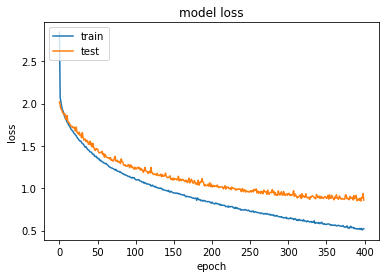

In [180]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

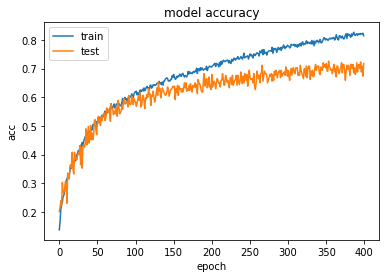

In [185]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [182]:
#save model
model_name = 'Emotion_Voice_Detection_Model_ravdess.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\Emotion_Voice_Detection_Model_ravdess.h5 


In [183]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [184]:
#load
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model_ravdess.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 71.72%


In [49]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

296/296 [==============================] - 0s 340us/step


In [56]:
preds

array([[2.66022030e-02, 2.14281943e-04, 9.39058664e-05, ...,
        4.03722376e-03, 1.82528456e-03, 5.22249793e-05],
       [1.29738124e-04, 6.14666939e-01, 8.63665406e-09, ...,
        2.37811846e-03, 1.55077539e-02, 1.94289178e-15],
       [3.88972148e-05, 1.69513584e-10, 7.52452300e-13, ...,
        8.34988896e-08, 1.12436943e-01, 3.35067772e-11],
       ...,
       [1.18865046e-05, 6.00093244e-06, 3.43984254e-08, ...,
        9.99550045e-01, 2.60585221e-04, 3.61109498e-13],
       [4.97554744e-08, 9.96226430e-01, 7.56737202e-14, ...,
        6.00566680e-11, 1.10535424e-04, 3.44360533e-14],
       [3.04297660e-03, 1.16627074e-04, 3.81757435e-03, ...,
        2.62424310e-05, 6.29570127e-01, 1.68598292e-03]], dtype=float32)

In [57]:
preds1=preds.argmax(axis=1)
preds1

array([3, 1, 3, 5, 4, 3, 7, 0, 0, 3, 3, 0, 7, 0, 3, 2, 4, 6, 3, 4, 3, 5,
       0, 0, 7, 3, 3, 1, 6, 3, 1, 7, 0, 3, 4, 4, 5, 0, 0, 4, 1, 6, 3, 4,
       3, 6, 6, 2, 6, 6, 3, 5, 4, 1, 1, 5, 4, 6, 6, 0, 1, 4, 0, 5, 0, 2,
       0, 7, 3, 6, 3, 6, 3, 3, 1, 6, 1, 3, 1, 5, 7, 3, 1, 3, 5, 0, 3, 3,
       4, 6, 6, 1, 1, 0, 5, 4, 3, 0, 0, 6, 2, 0, 2, 6, 1, 6, 2, 6, 5, 1,
       4, 3, 3, 6, 3, 6, 6, 1, 4, 2, 6, 1, 7, 5, 6, 3, 7, 3, 3, 3, 5, 1,
       7, 6, 0, 0, 4, 1, 0, 4, 1, 7, 1, 6, 6, 7, 5, 4, 3, 6, 0, 7, 3, 5,
       4, 4, 3, 4, 4, 3, 0, 0, 3, 4, 3, 1, 3, 0, 1, 3, 3, 5, 2, 0, 0, 0,
       5, 4, 0, 3, 2, 3, 6, 4, 0, 6, 0, 7, 4, 5, 7, 3, 3, 5, 4, 4, 4, 3,
       1, 7, 1, 7, 0, 5, 0, 7, 1, 1, 2, 4, 1, 0, 4, 5, 3, 0, 3, 3, 6, 1,
       6, 4, 3, 6, 2, 1, 3, 1, 1, 3, 4, 6, 6, 0, 2, 1, 7, 1, 3, 6, 3, 0,
       2, 3, 4, 6, 3, 0, 6, 7, 1, 4, 1, 6, 0, 6, 3, 0, 6, 5, 3, 7, 3, 7,
       4, 3, 0, 1, 4, 3, 6, 0, 3, 0, 4, 1, 2, 2, 5, 1, 2, 7, 2, 0, 3, 5,
       3, 3, 2, 6, 7, 1, 1, 2, 1, 4, 0, 5, 1, 4, 7,

In [58]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [59]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,fearful
1,calm
2,fearful
3,neutral
4,happy
5,fearful
6,surprised
7,angry
8,angry
9,fearful


In [60]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [61]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,fearful
1,calm
2,fearful
3,neutral
4,happy
5,calm
6,disgusted
7,angry
8,angry
9,fearful


In [62]:
finaldf = actualdf.join(preddf)

In [63]:
finaldf[170:180]

,actualvalues,predictedvalues
170,fearful,fearful
171,neutral,neutral
172,surprised,disgusted
173,angry,angry
174,angry,angry
175,angry,angry
176,surprised,neutral
177,happy,happy
178,angry,angry
179,fearful,fearful


In [64]:
finaldf.groupby('actualvalues').count()


,actualvalues
predictedvalues,
angry,71
calm,83
disgusted,30
fearful,96
happy,66
neutral,44
sad,68
surprised,47


In [65]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,71
calm,83
disgusted,30
fearful,96
happy,66
neutral,44
sad,68
surprised,47
